<center>Заметка 5. Текстовая строчка</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.13</center>

<center>Аннотация</center>
<p>
Показано как преобразовывать, искать подстроки и тому подобное. В частности, рассматриваются регулярные выражения. Показано как формируется список токенов и их значений. Методы замены подстрок и разбиения строки на подстроки. Рассматривается и чтение текстового файла с таблицей (цен акции за некий период).
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<h2>Печать строки</h2>

<h3>Красивая печать</h3>

In [1]:
# В фигурные скобки подставляются значения аргументов метода format.
"первое число {}, а теперь второе {}".format(4,2)
# первый аргумент вместо первой пары фигурных скобок, а второй вместо второй.

'первое число 4, а теперь второе 2'

In [2]:
u = "первое число {}, а теперь второе {}"

In [3]:
type(u)

str

In [4]:
v = u.format(4,2)
v # Выведем значение переменной, т.е. строку.

'первое число 4, а теперь второе 2'

In [5]:
type(v)

str

In [6]:
print(v) # Напечатаем значение.

первое число 4, а теперь второе 2


Конечно можно подставить любой объект. Например строчку.

In [7]:
"{} получила {} баллов за контрольную.".format('Маша', 15)

'Маша получила 15 баллов за контрольную.'

Можно указать порядковый номер аргумента в фигурных скобоках явно.

In [8]:
"или иначе, для начала второе число {1}, а теперь первое число {0}".format(4,2)
 # Позволяет менять порядок вывода аргументов.

'или иначе, для начала второе число 2, а теперь первое число 4'

In [9]:
# Номер в фигурных скобрах можно повторять.
"или даже повторять {0}, {1}, {0}.".format(4, 2)

'или даже повторять 4, 2, 4.'

In [10]:
"или даже повторять {0}, {1:.2f}, {0:0.4}.".format(34564.123456, 2321.123456)

'или даже повторять 34564.123456, 2321.12, 3.456e+04.'

In [11]:
'{:.90f}'.format(2.5)

'2.500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [12]:
'{:5.2f}'.format(2.5)

' 2.50'

In [13]:
'{:5.2f}'.format(12.5) # float

'12.50'

In [14]:
'{:9.2e}'.format(12.5)

' 1.25e+01'

In [15]:
round(2.6)

3

In [16]:
round( 1.2345678, 3)

1.235

In [17]:
round( 1.2345678, ndigits=3)

1.235

Есть и более прдвинутый подход, где вместо номера указываем именной аргумент.

In [18]:
# Она подставляется автоматически в строке,
'sss {a} ff'.format(a=77) # т.е. там, где она заключена в фигурные скобки.

'sss 77 ff'

In [19]:
a = 55 # Происвоем переменной.
'sss {a} ff'.format() # Имя a должно быть в format.

KeyError: 'a'

In [20]:
'sss {a} ff'.format(a=a)

'sss 55 ff'

In [21]:
'sss {b} ff'.format(b=a)

'sss 55 ff'

In [22]:
'sss {a} ff'.format(a)

KeyError: 'a'

Можно и саму переменную использовать в скобках (метода format тогда не будет использоваться ).
Так, можно оперировать не порядковым номером, а именем переменной.

In [23]:
# Сначала присваиваем некой переменной значение.
a = 77 # Далее будем её использовать.

In [24]:
# Обращаю внимание на f перед строкой.
f'sss {a} ff' # {a} будет заменено на значение переменой a.

'sss 77 ff'

In [25]:
type(f'aa')

str

In [26]:
'sss {a} ff' # А вот что будет без f до строки.

'sss {a} ff'

<h3>Выравнивание</h3>

In [27]:
'dff'.zfill(5)

'00dff'

In [28]:
day = 7
f'{day}'.zfill(2)

'07'

In [29]:
s = 'sss'
s.center(8, '0')

'00sss000'

In [30]:
'sss'.center

<function str.center>

In [31]:
'sss'.center

<function str.center>

In [32]:
# Центрируем текст.
s = 'center'.center(10) # В скобке указывается длина итоговой строки.
s

'  center  '

In [33]:
len(s) # Длина строки.

10

In [34]:
s[2:-2] # Проверим что это так.

'center'

In [35]:
# Если трока больше требуемой величины.
s = 'center'.center(5) # то ничего не делается.
s

'center'

In [36]:
len(s)

6

In [37]:
# Пробелы превичной строки не учитываются,
l = 'q    '.center(8) # т.е. пробелы как обычные символы.
l

' q      '

In [38]:
len(l)

8

In [39]:
'Заявление'.center(80)

'                                   Заявление                                    '

In [40]:
# Выравненная на левый край.
t = ' qq qq'.ljust(10)
t, len( t )

(' qq qq    ', 10)

In [41]:
# Выравненная на правый край.
t = ' qq qq'.rjust(10)
t, len( t )

('     qq qq', 10)

In [42]:
'Сидоров Иван Иванович'.rjust(80)

'                                                           Сидоров Иван Иванович'

<h3>Сложные преобразования</h3>

In [43]:
ss = '*\tАня\n*\tКатя'
print(ss)

*	Аня
*	Катя


In [44]:
ss

'*\tАня\n*\tКатя'

In [45]:
len(ss) 

12

In [46]:
tt = ss.expandtabs(4) # Заменяем каждый символ табуляции на определенное количество пробелов.
tt

'*   Аня\n*   Катя'

In [47]:
len(tt) # Каждая табуляция 4 символа.

16

In [48]:
print(tt)

*   Аня
*   Катя


In [49]:
grades = 'Имя\tБаллы\nАня\t25\nКатя\t27'

In [50]:
print( grades )

Имя	Баллы
Аня	25
Катя	27


In [51]:
print(grades.expandtabs(16))

Имя             Баллы
Аня             25
Катя            27


Упр. Сделать таблицу (center len и тому подобное) с двумя колонками. Первая выровнена по левой границе, а вторая по центру. Причем название колонок центрированы. Для упрощения ширину колонок можно считать известной.
Например:

In [52]:
#  Имя   Баллы
#Сергей   85
#Анна     91
#Андрей   88

<b>Замена</b>

In [53]:
'студентка пришла на спецкурс.'.replace('студентка', 'Маша')

'Маша пришла на спецкурс.'

In [54]:
'студентка пришла на спецкурс.'.replace(['студентка'], ['Маша'])

TypeError: replace() argument 1 must be str, not list

<h2>Ручной парзинг</h2>

<h3>Встроенными функциями</h3>

<b>Числа</b>

Напомню

In [55]:
'45'.isdigit(), 'a45'.isdigit()

(True, False)

In [56]:
s = '45 ' #'a45 '
s = s.strip()
if s.isdigit():
    print('num ~ ', int(s))

num ~  45


<b>Дата и время</b>

In [57]:
from dateutil.parser import parse

In [58]:
d = parse("2015-01-13T16:12:04.000Z")

<h3>Текстовый файл</h3>

<b>Открытие файла</b>

Считаем данные из файла.

In [59]:
fdata = open("MTLRP_201101_211031.txt")

In [60]:
txt = fdata.read()
txt[:400]# Выведем только часть данных.

'<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\nMTLRP,W,20201102,000000,62.0000000,67.0000000,61.8000000,66.3500000,924730\nMTLRP,W,20201109,000000,66.8500000,69.5000000,65.9500000,69.1500000,2514560\nMTLRP,W,20201116,000000,69.7500000,72.1500000,68.0000000,70.4500000,3263630\nMTLRP,W,20201123,000000,70.4000000,71.5000000,69.6500000,70.4000000,1355960\nMTLRP,W,20201130,000000,70.6500000'

In [61]:
# Двигает каретку
fdata.read()
# Поэтому теперь пусто.

''

После работы с файлом его следует закрыть

In [62]:
fdata.close()

Дабы не забыть его закрыть принято использовать следующую конструкцию.

In [63]:
# Открываем файл и присваиваем переменной fdata
with open("MTLRP_201101_211031.txt") as fdata:
    txt = fdata.read()
# Файл автоматически будет закрыт.

Если файла не существует,
то будет ошибка

In [64]:
fdata = open("file.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

In [65]:
with open("file.txt") as fdata:
    txt = fdata.read()

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

Можно проверить его существование.

In [66]:
import os.path

In [67]:
os.path.isfile('file.txt')

False

In [68]:
fname = 'file.txt'
if not os.path.isfile( fname ):
    print("Файла не существует")

Файла не существует


In [69]:
os.path.isfile("MTLRP_201101_211031.txt")

True

<b>Обработка текстовых данных</b>

In [70]:
# Разобъем по строкам.
lines = txt.split('\n')
lines[:5]

['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>',
 'MTLRP,W,20201102,000000,62.0000000,67.0000000,61.8000000,66.3500000,924730',
 'MTLRP,W,20201109,000000,66.8500000,69.5000000,65.9500000,69.1500000,2514560',
 'MTLRP,W,20201116,000000,69.7500000,72.1500000,68.0000000,70.4500000,3263630',
 'MTLRP,W,20201123,000000,70.4000000,71.5000000,69.6500000,70.4000000,1355960']

In [71]:
# Это название столбцов.
lines[0]

'<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>'

In [72]:
# Сами данные это остальные строчки.
print(lines[1])
print("...")
print(lines[-2])
print(lines[-1])# Пустая строка

MTLRP,W,20201102,000000,62.0000000,67.0000000,61.8000000,66.3500000,924730
...
MTLRP,W,20211025,000000,312.1500000,319.9000000,282.3500000,296.5000000,9174930



Считать файл построчно

In [73]:
with open("MTLRP_201101_211031.txt") as fdata:
    for l in fdata:
        lines.append(l)

Или даже так:

In [74]:
with open("MTLRP_201101_211031.txt") as fdata:
    lines = fdata.readlines()

In [75]:
ll = lines[1] # Строка данных.
ll # Нужно разбить поля.

'MTLRP,W,20201102,000000,62.0000000,67.0000000,61.8000000,66.3500000,924730\n'

In [76]:
fields = ll.split(',')
fields # Отдельные поля

['MTLRP',
 'W',
 '20201102',
 '000000',
 '62.0000000',
 '67.0000000',
 '61.8000000',
 '66.3500000',
 '924730\n']

In [77]:
date = fields[2]
price = fields[4]
print('дата', date)
print('цена', price)

дата 20201102
цена 62.0000000


In [78]:
year = date[:4]
month = date[4:6]
day = date[7:9]
print(f"{year}/{month}/{day}")

2020/11/2


In [79]:
year + 1

TypeError: must be str, not int

In [80]:
year = int(year)
month = int(month)
day = int(day)

In [81]:
import datetime as dt

In [82]:
dt.date( year = year, month = month, day = day)

datetime.date(2020, 11, 2)

In [83]:
dates = []
prices = []
for ll in lines[1:]:
    fields = ll.split(',')
    if len(fields) < 9: # какие то левые строки
        break
    date = fields[2]
    price = fields[4]
    
    # Можно в одну строку
    year, month, day = int(date[:4]), int(date[4:6]), int(date[6:8])
    
    date = dt.date( year = year, month = month, day = day)
    
    
    dates.append(date)
    prices.append(price)

In [84]:
prices[:5]

['62.0000000', '66.8500000', '69.7500000', '70.4000000', '70.6500000']

Можно исправить первоначальный код, а можно написать генератор.

In [85]:
prices = [ float(p) for p in prices]

In [86]:
prices[:5]

[62.0, 66.85, 69.75, 70.4, 70.65]

Точки и значения вы сформировали. Теперь будем строить график. Для этого нужна ещё одна вспомогательная библиотека.

<b>Построение графиков</b>

Библиотека matplotlib применяется для вывода графиков. Точнее её подмодуль (подбиблиотека) pyplot.

In [87]:
# Длинное название к отмеченной подбиблиотеки (pyplot)
import matplotlib.pyplot as plt # обозначим plt.

In [88]:
#Следуюшща строка позволяет выводить данные прям на данной странице в блоках. Иначе будет "всплывать" отдельное окно.
#%matplotlib inline 

Отмечу, что последняя строчка относится к система jupyter, а не самому языку python.

Отрисуем нужную функцию. Используем для этого 100 точек.
После загрузки библитеки в систему, график по сформированным ранее данным стротися так:

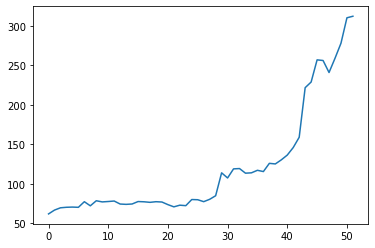

In [89]:
plt.plot( prices ) # Значений достаточно.

Но можно конечно добавить отсчеты по оси x и разукрасить график.

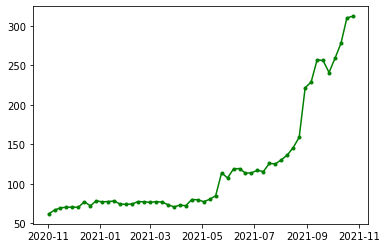

In [90]:
# plot строит график по-точечно.
plt.plot( dates, prices, 'g.-') # g -- green (зеленая), . и - задают стиль точки и прямой.

Даже дата правильно отобразилась!

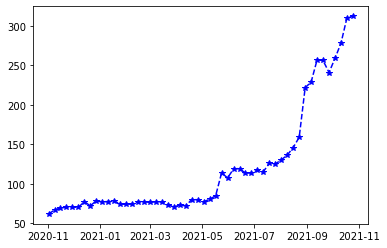

In [91]:
# b - синий, * -- звездочка в каждой точке. -- соединение пунктиром.
plt.plot( dates, prices, 'b*--')

In [92]:
# Цвета есть такие:
# 'b' -- синий     | 'c' -- бирюзовый   | 'k' -- черный
# 'g' -- зеленый   | 'm' -- пурпурный   | 'w' -- белый
# 'r' -- красный   | 'y' -- желтый      |

# стили прямых такие:
# '-' -- сплошная     | '-.' -- точка-дефис
# '--' -- пунктирная  | ':' -- по-точечно

# А стили точек:
# Различные размеры:
# '.', ',' и 'o' -- точек
# 'v', '^', '<' и '>' -- треугольников
# '1', '2', '3' и '4' -- уголка.
# Специфика:
# 's' -- квадрат    | 'h' -- гексагон-1   | 'x' -- знак x            | '|' -- вертикальные
# 'p' -- пентагон   | 'H' -- гексагон-2   | 'D' -- ромб              | '_' -- горизонтальные
# '*' -- звезда     | '+' -- знак плюс    | 'd' -- ромб утонченный   |

Text(0, 0.5, 'Цена')

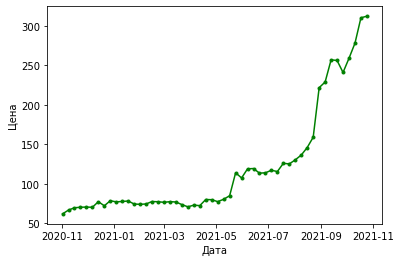

In [93]:
plt.plot( dates, prices, 'g.-')
plt.xlabel( "Дата" ) # Задаем название для оси абсцисс.
plt.ylabel( "Цена") # Задаем название для оси ординат.

Упр. Вычислить и нарисовать скользящее среднее по нескольким дням. Обычное среднее, т.е. сумма деленная на количество. Если подать команду (plot) в той же ячейке, то будет обе кривые на графике.

<b>Запись в файл</b>

Текстовые данные можно и в файл обратно записать.

In [94]:
cols = ['date', 'Val']

In [95]:
len(dates), len(prices)

(52, 52)

Если делать через правильную конструкцию:

In [96]:
with open('./output.txt', 'wt') as fwrite:#wt -- write text
    fwrite.write( ';'.join(cols) + '\n' )
    for i in range(len(dates)):
        fwrite.write( str(dates[i]) + ';' + str(prices[i]) + '\n')

В Линукс проверяем так:

In [97]:
cat ./output.txt

date;Val
2020-11-02;62.0
2020-11-09;66.85
2020-11-16;69.75
2020-11-23;70.4
2020-11-30;70.65
2020-12-07;70.35
2020-12-14;77.45
2020-12-21;72.25
2020-12-28;78.65
2021-01-04;77.2
2021-01-11;77.7
2021-01-18;78.3
2021-01-25;74.5
2021-02-01;74.1
2021-02-08;74.55
2021-02-15;77.65
2021-02-22;77.35
2021-03-01;76.65
2021-03-08;77.45
2021-03-15;77.05
2021-03-22;73.75
2021-03-29;70.95
2021-04-05;73.05
2021-04-12;72.45
2021-04-19;80.2
2021-04-26;79.95
2021-05-03;77.5
2021-05-10;80.5
2021-05-17;85.0
2021-05-24;114.0
2021-05-31;107.5
2021-06-07;119.0
2021-06-14;119.4
2021-06-21;113.55
2021-06-28;114.0
2021-07-05;117.2
2021-07-12;115.6
2021-07-19;126.0
2021-07-26;125.25
2021-08-02;130.4
2021-08-09;136.45
2021-08-16;146.0
2021-08-23;159.0
2021-08-30;221.75
2021-09-06;228.9
2021-09-13;256.95
2021-09-20;256.15
2021-09-27;240.95
2021-10-04;258.95
2021-10-11;278.0
2021-10-18;310.2
2021-10-25;312.15


<h3>Различные проверки</h3>

В более сложных, не табличных, текстовых файлах.

<b>Отсечение</b>

In [98]:
'a ggg ggg'.partition(' ') #rpartition

('a', ' ', 'ggg ggg')

In [99]:
tt = 'с 12 час 23 мин по 14 час 31 мин'

In [100]:
ss = tt.partition('по')
ss

('с 12 час 23 мин ', 'по', ' 14 час 31 мин')

In [101]:
# Тогда получится, что
ss[0] # это время с

'с 12 час 23 мин '

In [102]:
ss[0].strip()

'с 12 час 23 мин'

<b>Префикс и суфикс</b>

Истина, если начинается с нужной строки.

In [103]:
'aa'.startswith('a'), 'abcde'.startswith('bc')

(True, False)

In [104]:
'abcde'.startswith('bc', 1) # можно указать номер символа с которого начинать сравнение.

True

In [105]:
'часов'.startswith('час'), 'час'.startswith('час'), 'час'.startswith('часов')

(True, True, False)

Истина, если завершается нужной строкой.

In [106]:
'sdefgh'.endswith('gh'), 'asdfg'.endswith('df')

(True, False)

In [107]:
'asdfg'.endswith('df', 0, -1)

True

In [108]:
'12 часов'.endswith('часов'), '12 минут'.endswith('часов')

(True, False)

In [109]:
ss[0]

'с 12 час 23 мин '

In [110]:
ss[0].startswith('с ')

True

In [111]:
ss[0][2:].strip()

'12 час 23 мин'

In [112]:
ss[0][2:].strip().endswith('мин')

True

In [113]:
ss[2] # это время по.

' 14 час 31 мин'

In [114]:
ss[2].strip()

'14 час 31 мин'

<h2>Регулярные выражения</h2>

In [115]:
import re

<h3>Поиск подстроки</h3>

In [116]:
s = 'некий текст.. еще немного текста... и вот завершающий текст.'
len(s)

60

In [117]:
match = re.search('текст', s)
match

<_sre.SRE_Match object; span=(6, 11), match='текст'>

In [118]:
match.span()

(6, 11)

In [119]:
match.pos, match.endpos

(0, 60)

Нам нужно вот это

In [120]:
match.start(), match.end()

(6, 11)

In [121]:
s[match.start():match.end()]

'текст'

<b>Перемещение по всем совпадениям</b>

Следующий текст ищется просто сдвигом строки

In [122]:
match = re.search('текст', s[match.end():] )
match

<_sre.SRE_Match object; span=(15, 20), match='текст'>

При отсутствии искомой подстроки возвращается None.

In [123]:
match = re.search('текст', s[-2:] )
match

In [124]:
ss = s # ss нам будет нужна для сдвига строки.
match = re.search('текст', ss)
while match != None:
    print( match.start(), match.end() )
    ss = ss[match.end():]
    match = re.search('текст', ss )

6 11
15 20
23 28


In [125]:
ss = s
match = re.search('текст', ss)
res = ""
while match != None:
    res = res + ss[:match.start()] + 'ТЕКСТ'
    ss = ss[match.end():]
    match = re.search('текст', ss )
res = res + ss # Не забываем про конец строки.
res

'некий ТЕКСТ.. еще немного ТЕКСТа... и вот завершающий ТЕКСТ.'

In [126]:
i = 0 # Конечно можно и перемещая индекс.
match = re.search('текст', s[i:])
while match != None:
    print( match.start(), match.end() )
    i += match.end()
    match = re.search('текст', s[i:] )

6 11
15 20
23 28


Так можно сделать замену текста.

Есть и итератор

In [127]:
res = ""
last = 0
for match in re.finditer('текст', s):
    res = res + s[last:match.start()] + 'ТЕКСТ'
    last = match.end()
res = res + s[last:] # Не забываем про конец строки.
res

'некий ТЕКСТ.. еще немного ТЕКСТа... и вот завершающий ТЕКСТ.'

In [128]:
re.sub('текст', "TEXT", s)

'некий TEXT.. еще немного TEXTа... и вот завершающий TEXT.'

Можно даже указать количество замен.

In [129]:
re.sub('текст', "TEXT", s, count = 2)

'некий TEXT.. еще немного TEXTа... и вот завершающий текст.'

<h3>Поиск сложных текстовых выражений</h3>

<b>Опциональные буквы</b>

In [130]:
s = "This text is about the difference between color and colour."

? -- Позволяет указать, что предыдущий символ опционален,
т.е. он может быть, а может и не быть.

In [131]:
match = re.search('colou?r', s)
s[match.start():match.end()]

'color'

In [132]:
match2 = re.search('colou?r', s[match.end():])
s[match.end():] [match2.start():match2.end()]

'colour'

In [133]:
for match in re.finditer('colou?r', s):
    print( s[match.start():match.end()] )

color
colour


<b>Когда одного не хватает</b>

\+ -- говорит о том, что один или много.

In [134]:
s = "Как дела?)))"

In [135]:
match = re.search('\)+', s)
s[match.start():match.end()]

')))'

А если вспомнить, что ставят и :

In [136]:
s = "Как дела?)))\nНорм:)"
print(s)

Как дела?)))
Норм:)


In [137]:
for match in re.finditer(':?\)+', s):
    print( s[match.start():match.end()] )

)))
:)


Подмена на мета символы

In [138]:
ss = s
match = re.search(':?\)+', ss)
res = ""
while match != None:
    res = res + ss[:match.start()] + '\U0001F603'#\U unicode, utf8
    ss = ss[match.end():]
    match = re.search(':?\)+', ss )
print(res)

Как дела?😃
Норм😃


In [139]:
newres = re.sub(':?\)+', '\U0001F603', s)
print(newres)

Как дела?😃
Норм😃


In [140]:
newres == res

True

Можно искать символы по их стандартизованному названию.

In [141]:
print('\N{SMILING FACE WITH OPEN MOUTH}')

😃


In [142]:
print('\N{SMILING FACE WITH OPEN MOUTH AND SMILING EYES}' + '\N{SMIRKING FACE}')

😄😏


In [143]:
ss = s
match = re.search(':?\)+', ss)
res = []
src = []
while match != None:
    src = src + [ss[:match.start()]] + [ss[match.start():match.end()]]
    res = res + [ss[:match.start()]] + ['\U0001F603']
    ss = ss[match.end():]
    match = re.search(':?\)+', ss )
print(res)
print(src)

['Как дела?', '😃', '\nНорм', '😃']
['Как дела?', ')))', '\nНорм', ':)']


<b>Несколько вариантов для буквы</b>

Когда несколько вариантов для буквы.
В данном случае М и Ж.

In [144]:
s = 'Некий текст ... Пол: М\n... ещё текст... Пол: Ж... текст'

In [145]:
# Перечислим два возможных варианта буквы.
for match in re.finditer('Пол: [МЖ]', s):# Запятой между ними нет!
    print( s[match.start():match.end()] )

Пол: М
Пол: Ж


В итоге нашли оба варианта нашлись.

<b>Возможно сколько угодно... хоть 0</b>

In [146]:
s = 'Некий текст ... Пол:  М\n... ещё текст... Пол:   Ж... текст Пол:М завершим'

In [147]:
re.search('Пол: [МЖ]', s)
# С другим количеством пробелов не сработает.

\* -- 0 или более повторений...

In [148]:
for match in re.finditer('Пол: *[МЖ]', s):# Запятой между ними нет!
    print( s[match.start():match.end()] )

Пол:  М
Пол:   Ж
Пол:М


Все подстроки найдены, даже с нулевым количеством пробелов.

<b>Разбиение строки на подстроки</b>

In [149]:
s = "Маша Катя  Даша     Лена"

In [150]:
s.split(' ')

['Маша', 'Катя', '', 'Даша', '', '', '', '', 'Лена']

Так не совсем правильно:

In [151]:
re.split(" *", s)

/data/conda/anaconda3/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


['Маша', 'Катя', 'Даша', 'Лена']

Упр. В чем ошибка в прошлой ячейке? Как исправить регулярное выражение?

<h3>Целые объекты</h3>

<b>Разные целые слов слов</b>

А если нужно целые слова вместо букв?

In [152]:
s = 'Некий текст ... Пол:  муж\n... ещё текст... Пол:   жен... текст Пол:муж завершим'
match = re.search('Пол: *муж|жен', s)
s[match.start():match.end()]

'Пол:  муж'

In [153]:
for match in re.finditer('Пол: *(муж|жен)', s):
    print( s[match.start():match.end()] )

Пол:  муж
Пол:   жен
Пол:муж


In [154]:
s = "С январе и октябре"
re.search('январь|февраль', s)

В русском языке нужно убрать окончание:

In [155]:
s = "С январе и октябре"
match = re.search('январ|феврал', s)
s[match.start():match.end()]

'январ'

Система старается сделать строчку как можно более длинной.
Укажем ей возможность какого угодно количества букв (\w) в конце.

In [156]:
s = "С январе и октябре"
match = re.search('январ[\w]*|феврал', s)
s[match.start():match.end()]

'январе'

Но можно конечно указать конкретные.

In [157]:
s = "С январе и октябре"
match = re.search('(январ|феврал)[ьяе]', s)
s[match.start():match.end()]

'январе'

На самом деле как мы увидим далее можно применять и для регулярных выражений,
т.е. рекурсивно.

<b>Поиск чисел</b>

Что если нужно найти числа? Целые числа.
Что есть корректно записанное целое число?
Это символ из 1 до 9, а далее символы 0-9 в любом количестве.

In [158]:
s = 'некий 1234.. еще немного 567... ошибка 045..и вот завершающий 89'
for match in re.finditer('[1-9]+[0-9]*', s):
    print( s[match.start():match.end()] )

1234
567
45
89


Но сработает так

In [159]:
s = 'ошибка 045..'
match = re.search('[1-9]+[0-9]*', s)
s[match.start():match.end()]

'45'

Нужно указать что перед найденной строкой не было цифр...
Для этого есть мета символ ^

In [160]:
s = 'ошибка 045..'
match = re.search('[^0-9][1-9]+[0-9]*', s)

In [161]:
s = 'некий 1234.. еще немного 567... ошибка 045..и вот завершающий 89'
ss = s
match = re.search('[^0-9]?[1-9]+[0-9]*', ss)
res = []
src = []
while match != None:
    src = src + [ss[:match.start()]] + [ss[match.start():match.end()]]
    res = res + [ss[:match.start()]] + ['<NUM>']
    ss = ss[match.end():]
    match = re.search('[^0-9][1-9]+[0-9]*', ss )
print(res)
print(src)

['некий', '<NUM>', '.. еще немного', '<NUM>', '... ошибка 045..и вот завершающий', '<NUM>']
['некий', ' 1234', '.. еще немного', ' 567', '... ошибка 045..и вот завершающий', ' 89']


In [162]:
s = '1234.. еще немного 567... ошибка 045..и вот завершающий 89'
ss = s
match = re.search('([^0-9][1-9]+[0-9]*)|(^[1-9]+)', ss)#! тут |[0-9]*
res = []
src = []
while match != None:
    src = src + [ss[:match.start()]] + [ss[match.start():match.end()]]
    res = res + [ss[:match.start()]] + ['<NUM>']
    ss = ss[match.end():]
    match = re.search('[^0-9][1-9]+', ss )#[0-9]*
print(res)
print(src)

['', '<NUM>', '.. еще немного', '<NUM>', '... ошибка 045..и вот завершающий', '<NUM>']
['', '1234', '.. еще немного', ' 567', '... ошибка 045..и вот завершающий', ' 89']


<h3>Понятие группы</h3>

In [163]:
s = "Вермя 10:23:45 текст"

In [164]:
match = re.search('[0-9][0-9]:[0-9][0-9]:[0-9][0-9]', s)
s[match.start():match.end()]

'10:23:45'

Время найдено, но его все-равно нужно парзисть.

In [165]:
match = re.search('([0-9][0-9]):([0-9][0-9]):([0-9][0-9])', s)
s[match.start():match.end()]

'10:23:45'

Но, теперь вырезаны отдельные найденные части.

In [166]:
match.groups()

('10', '23', '45')

In [167]:
match.group()

'10:23:45'

In [168]:
match.group(1)
# Вывела часы.

'10'

In [169]:
hours = match.group(1)
mins = match.group(2)
secs = match.group(3)
hours, mins, secs 

('10', '23', '45')

In [170]:
# Очень важно указать r!
re.sub( '([0-9][0-9]):([0-9][0-9]):([0-9][0-9])', r'\1 часов и \2 минут', s)
# \1 \2 указывают на номер группы

'Вермя 10 часов и 23 минут текст'

In [171]:
match = re.search('(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])', s)
s[match.start():match.end()]

'10:23:45'

Теперь можно и так:

In [172]:
match.groupdict()

{'часы': '10', 'минуты': '23', 'секунды': '45'}

In [173]:
match.group('часы')

'10'

In [174]:
# Очень важно указать r!
re.sub( '(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])', r'\g<часы> часов и \g<минуты> минут', s)
# \1 \2 указывают на номер группы

'Вермя 10 часов и 23 минут текст'

<b>Как их много</b>

In [175]:
s

'Вермя 10:23:45 текст'

In [176]:
rtime = '(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])'
re.findall( rtime, 'd' +s+'ab')

[('10', '23', '45')]

In [177]:
'(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])|(?P<words>[abcd]+)'

'(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])|(?P<words>[abcd]+)'

In [178]:
re.findall(rtime+'|(?P<words>[abcd]+)', 'd' +s+'ab')

[('', '', '', 'd'), ('10', '23', '45', ''), ('', '', '', 'ab')]

In [179]:
re.findall("a*","abcdabfga")

['a', '', '', '', 'a', '', '', '', 'a', '']

In [180]:
rall = rtime+'|(?P<words>[abcd]+)'
rall

'(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])|(?P<words>[abcd]+)'

Упр. Как извлечь название групп?
Должно получится
['часы', 'минуты', 'секунды', 'words']

???

<h2>Граматика</h2>

<h3>Ручной подход</h3>

<b>Собственным циклом</b>

In [181]:
s = '23+56*8-6/3+8'
ss = s

In [182]:
rnum = '(?P<NUM>[1-9]+[0-9]*)'
rops = '(?P<OP>[+-/*//])'
rr = rnum + '|' + rops
match = re.search( rr, ss)
res = []
src = []
k=0
while match != None:
    k+=1
    src = src + [ss[:match.start()]] + [ss[match.start():match.end()]]
    res = res + [ss[:match.start()]]
    ans = match.groups()
    if ans[0]:
        res += ['<NUM>']
    elif ans[1]:
        res += ['<OP>']
    ss = ss[match.end():]
    match = re.search(rr, ss )
print(res)
print(src)

['', '<NUM>', '', '<OP>', '', '<NUM>', '', '<OP>', '', '<NUM>', '', '<OP>', '', '<NUM>', '', '<OP>', '', '<NUM>', '', '<OP>', '', '<NUM>']
['', '23', '', '+', '', '56', '', '*', '', '8', '', '-', '', '6', '', '/', '', '3', '', '+', '', '8']


In [183]:
res = [i for i in res if len(i)]# Уберем пустые строки.
res

['<NUM>',
 '<OP>',
 '<NUM>',
 '<OP>',
 '<NUM>',
 '<OP>',
 '<NUM>',
 '<OP>',
 '<NUM>',
 '<OP>',
 '<NUM>']

In [184]:
src = [i for i in src if len(i)]
src

['23', '+', '56', '*', '8', '-', '6', '/', '3', '+', '8']

In [185]:
len(src), len(res)

(11, 11)

In [186]:
i = 0
while i < len(res):
    if res[i] == '<OP>':
        if src[i] == '*':
            v = float(src[i-1]) * float(src[i+1])
        elif src[i] == '/':
            v = float(src[i-1]) / float(src[i+1])
        else:
            i += 1
            continue
        src[i-1:i+2] = [v]
        res[i-1:i+2] = ['<NUM>']
        i -= 2
    i += 1

In [187]:
src

['23', '+', 448.0, '-', 2.0, '+', '8']

In [188]:
i = 0
while i < len(res):
    if res[i] == '<OP>':
        if src[i] == '+':
            v = float(src[i-1]) + float(src[i+1])
        elif src[i] == '-':
            v = float(src[i-1]) - float(src[i+1])
        else:
            i += 1
            continue
        src[i-1:i+2] = [v]
        res[i-1:i+2] = ['<NUM>']
        i -= 2
    i += 1

In [189]:
src

[477.0]

In [190]:
23+56*8-6/3+8

477.0

<b>Методом</b>

In [191]:
s

'23+56*8-6/3+8'

In [192]:
tkns = re.findall(rr, '23+7-5+99-56*2-7+21/7+6-2*3')
tkns

[('23', ''),
 ('', '+'),
 ('7', ''),
 ('', '-'),
 ('5', ''),
 ('', '+'),
 ('99', ''),
 ('', '-'),
 ('56', ''),
 ('', '*'),
 ('2', ''),
 ('', '-'),
 ('7', ''),
 ('', '+'),
 ('21', ''),
 ('', '/'),
 ('7', ''),
 ('', '+'),
 ('6', ''),
 ('', '-'),
 ('2', ''),
 ('', '*'),
 ('3', '')]

In [193]:
ops = []
nums = []
while len(tkns) or len(ops):
    print("?", ops, nums)
    val = None
    if len(tkns):
        val = tkns.pop(0)
        if val[1]=='':
            nums.append(val[0])
            continue
        elif val[1] in ['*','/']:
            ops.append(val[1])
            continue
        elif val[1] in ['+','-']:
            pass
    while len(ops):
        print('<<', ops, nums)
        val2 = ops.pop()
        ##print(val2)
        v1 = float(nums.pop())
        v2 = float(nums.pop())
        if val2 == '/':
            vv = v2/v1
        elif val2 == '*':
            vv = v1*v2
        elif val2 == '+':
            vv = v2+v1
        elif val2 == '-':
            vv = v2-v1
        nums.append(vv)
        print('>>', ops, nums)
    if val != None:
        ops.append(val[1])

? [] []
? [] ['23']
? ['+'] ['23']
? ['+'] ['23', '7']
<< ['+'] ['23', '7']
>> [] [30.0]
? ['-'] [30.0]
? ['-'] [30.0, '5']
<< ['-'] [30.0, '5']
>> [] [25.0]
? ['+'] [25.0]
? ['+'] [25.0, '99']
<< ['+'] [25.0, '99']
>> [] [124.0]
? ['-'] [124.0]
? ['-'] [124.0, '56']
? ['-', '*'] [124.0, '56']
? ['-', '*'] [124.0, '56', '2']
<< ['-', '*'] [124.0, '56', '2']
>> ['-'] [124.0, 112.0]
<< ['-'] [124.0, 112.0]
>> [] [12.0]
? ['-'] [12.0]
? ['-'] [12.0, '7']
<< ['-'] [12.0, '7']
>> [] [5.0]
? ['+'] [5.0]
? ['+'] [5.0, '21']
? ['+', '/'] [5.0, '21']
? ['+', '/'] [5.0, '21', '7']
<< ['+', '/'] [5.0, '21', '7']
>> ['+'] [5.0, 3.0]
<< ['+'] [5.0, 3.0]
>> [] [8.0]
? ['+'] [8.0]
? ['+'] [8.0, '6']
<< ['+'] [8.0, '6']
>> [] [14.0]
? ['-'] [14.0]
? ['-'] [14.0, '2']
? ['-', '*'] [14.0, '2']
? ['-', '*'] [14.0, '2', '3']
<< ['-', '*'] [14.0, '2', '3']
>> ['-'] [14.0, 6.0]
<< ['-'] [14.0, 6.0]
>> [] [8.0]


In [194]:
ops, nums

([], [8.0])

In [195]:
23+56*2-7+21/7+6

137.0

In [196]:
23+7-5+99-56*2-7+21/7+6-2*3

8.0